# Proyecto 1 del curso de Machine Learning
## Presentado por Daniel Mateo Guatibonza [201611360] y Sofía Gutiérrez R [201612121]

In [1]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
import tensorflow as tf
import numpy as np
import os

In [2]:
IMAGE_SHAPE = (160, 160, 3)
CLASS_ONE = "Mundo4"

TRAIN_DATA_FILES = ["./DataNous/Caso_Facil/Entrenamiento/Mundo4/*.png", "./DataNous/Caso_Facil/Entrenamiento/Mundo7/*.png"]
VALIDATION_DATA_FILES = ["./DataNous/Caso_Facil/Validacion/Mundo4/*.png", "./DataNous/Caso_Facil/Validacion/Mundo7/*.png"]

CHECKPOINTS = "./DataNous/Caso_Facil/Checkpoints/Caso_Facil_{epoch:04d}.h5"

BATCH_SIZE = 64

In [3]:
base_model = InceptionV3(input_shape=IMAGE_SHAPE,
                            include_top=False,
                            weights='imagenet')
base_model.trainable = False
global_averge_pool = GlobalAveragePooling2D()
capa_salida = Dense(units=1, activation='sigmoid') # , kernel_regularizer="l2")

In [4]:
model = Sequential([base_model, global_averge_pool, capa_salida])
tf.print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________
None


In [5]:
def process_dataset(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    label = parts[-2]
    label = label == CLASS_ONE
    label = tf.cast(label, dtype=tf.float32)

    image = tf.io.read_file(file_path)
    image = tf.image.decode_png(image)
    image = tf.image.resize(image, (128, 128))
    image = (tf.image.convert_image_dtype(image, tf.float32) / 127.5) - 1

    return image, label

In [6]:
train_dataset = tf.data.Dataset.list_files(TRAIN_DATA_FILES)
train_dataset = train_dataset.map(process_dataset, tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=1024, reshuffle_each_iteration=True)
train_dataset = train_dataset.batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

validation_dataset = tf.data.Dataset.list_files(VALIDATION_DATA_FILES)
validation_dataset = validation_dataset.map(process_dataset, tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
validation_dataset = validation_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [7]:
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
Loss = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer=Optimizer,
               loss=Loss,
               metrics=['binary_accuracy'])

checkpoints = tf.keras.callbacks.ModelCheckpoint(CHECKPOINTS,
                                                 save_best_only=True,
                                                 monitor='binary_accuracy')

In [8]:
num_batches = np.ceil(len(list(tf.data.Dataset.list_files(TRAIN_DATA_FILES))) / BATCH_SIZE)
num_batches

363.0

In [9]:
history = model.fit(x=train_dataset,
                       shuffle=True,
                       #verbose=2,
                       callbacks=[checkpoints], #, TensorBoard],
                       steps_per_epoch=num_batches,
                       epochs=10,
                       validation_data=validation_dataset,
                       initial_epoch=0)

Train for 363.0 steps, validate for 41 steps
Epoch 1/10
363/363 [==============================] - 828s 2s/step - loss: 0.5577 - binary_accuracy: 0.7021 - val_loss: 0.7835 - val_binary_accuracy: 0.5450
Epoch 2/10
363/363 [==============================] - 826s 2s/step - loss: 0.4041 - binary_accuracy: 0.8180 - val_loss: 0.8616 - val_binary_accuracy: 0.5372
Epoch 3/10
363/363 [==============================] - 828s 2s/step - loss: 0.3461 - binary_accuracy: 0.8528 - val_loss: 0.9085 - val_binary_accuracy: 0.5395
Epoch 4/10
363/363 [==============================] - 831s 2s/step - loss: 0.3077 - binary_accuracy: 0.8720 - val_loss: 0.9691 - val_binary_accuracy: 0.5364
Epoch 5/10
363/363 [==============================] - 845s 2s/step - loss: 0.2850 - binary_accuracy: 0.8800 - val_loss: 0.9821 - val_binary_accuracy: 0.5388
Epoch 6/10
363/363 [==============================] - 830s 2s/step - loss: 0.2643 - binary_accuracy: 0.8908 - val_loss: 0.9956 - val_binary_accuracy: 0.5357
Epoch 7/10
36

(<tf.Tensor: id=42194, shape=(32, 128, 128, 3), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.0382353 , 

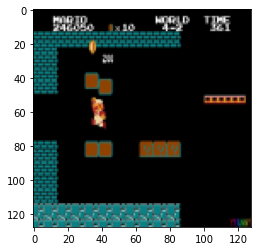

In [22]:
import matplotlib.pyplot as plt
for i in validation_dataset.take(1):
    plt.imshow(i[0][0])
    print(i)

{'loss': [0.5577351796140183, 0.4041684904931312, 0.34616747569898154, 0.30762869660430747, 0.28508624891289425, 0.26433667824553064, 0.2540587061965094, 0.23892910147861593, 0.2301244008467667, 0.22039588867293008], 'binary_accuracy': [0.7021368, 0.8180252, 0.85283476, 0.8719628, 0.87997586, 0.8908323, 0.8972945, 0.90186113, 0.91090816, 0.9124591], 'val_loss': [0.7834596532147106, 0.8616457712359544, 0.9085191328351091, 0.9690839808161665, 0.9821401107602004, 0.9956028185239653, 0.973577057443014, 1.0199671474898733, 1.1593053602590793, 1.1117218267626878], 'val_binary_accuracy': [0.5449612, 0.53720933, 0.53953487, 0.5364341, 0.5387597, 0.5356589, 0.5379845, 0.5271318, 0.51627904, 0.5224806]}


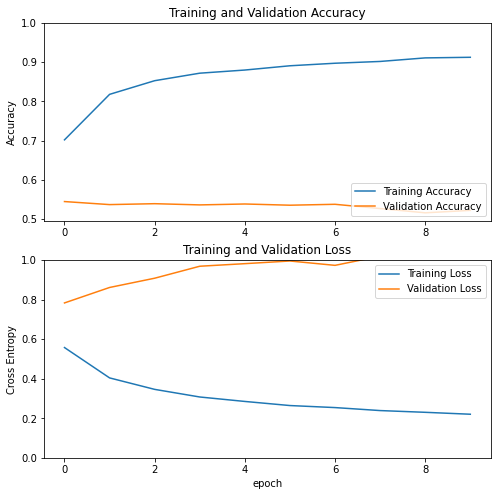

In [29]:
print(history.history)
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [30]:
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

Number of layers in the base model:  155


In [31]:
model.compile(optimizer=Optimizer,
               loss=Loss,
               metrics=['binary_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,863,873
Non-trainable params: 395,392
_________________________________________________________________


In [ ]:
history_fine = model.fit(x=train_dataset,
                       shuffle=True,
                       #verbose=2,
                       callbacks=[checkpoints], #, TensorBoard],
                       steps_per_epoch=num_batches,
                       epochs=10,
                       validation_data=validation_dataset,
                       initial_epoch=0)

Train for 363.0 steps, validate for 41 steps
Epoch 1/10
312/363 [========================>.....] - ETA: 2:55 - loss: 0.0790 - binary_accuracy: 0.9681